### Import Library

import library yang dibutuhkan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn
import statistics
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.cluster import KMeans
from kneed import KneeLocator

### Load Dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Bepe09/ALP_DM/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv")
data.head()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0


### EDA

Mengecek dataset memiliki nilai null, duplikat, dll atau tidak

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 87 non-null     float64
 3   Number_of_Warts      89 non-null     float64
 4   Type                 85 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

Melihat ada tidaknya imbalance dalam dataset dengan menggunakan barplot

<AxesSubplot:xlabel='Result_of_Treatment', ylabel='count'>

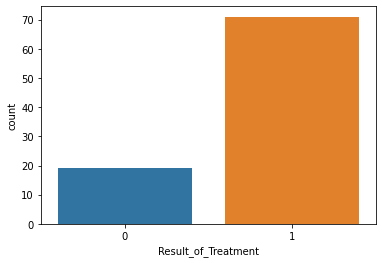

In [6]:
sns.countplot(x = data['Result_of_Treatment'])

dapat dilihat bahwa data imbalance sehingga perlu diperbaiki terlebih dahulu agar menjadi dataset yang balance

Mencari korelasi antar variabel

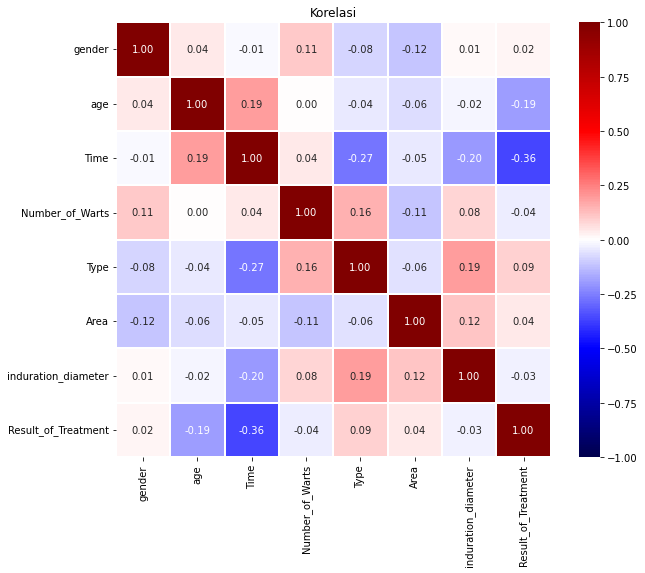

In [7]:
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "seismic", annot=True, fmt='.2f', linewidths=0.1, square = True)
plt.title("Korelasi")
plt.show()

Dalam heatmap terlihat bahwa korelasi yang mendekati warna merah menunjukkan korelasi yang lebih tinggi dan yang mendekati warna biru menunjukkan korelasi yang lebih rendah

### Fill Nan Value

Mengisi missing value

#### Time

Mengisi Nan value pada time menggunakan linear regression

In [8]:
datafill = data.dropna()
X = datafill[['age']]
y = datafill['Time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 50)

In [9]:
lineregg = LinearRegression()
lineregg.fit(X_train,y_train)
y_pred = lineregg.predict(X_test)
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
mape = mean_absolute_percentage_error(y_test, y_pred)*100
print("MAPE: ", mape)
print("Score : ", lineregg.score(X_test, y_test))

Root Mean Squared Error (RMSE):  1.2423247360805734
MAPE:  17.4959014028657
Score :  0.618626532848762


In [10]:
data[data['Time'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
43,1,38,NaN,8.0,2.0,56,45.0,1
50,1,54,NaN,13.0,3.0,43,5.0,1
72,2,28,NaN,4.0,1.0,9,2.0,1


In [11]:
df_timemiss = data["Time"].isna()
var_timemiss = pd.DataFrame(data[['age']][df_timemiss])
time_pred = np.round(lineregg.predict(var_timemiss), 2)
missingval = data['Time'].isna()
data.loc[missingval,'Time'] = time_pred

In [12]:
data.iloc[[43,50,72]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
43,1,38,7.53,8.0,2.0,56,45.0,1
50,1,54,8.33,13.0,3.0,43,5.0,1
72,2,28,7.04,4.0,1.0,9,2.0,1


In [13]:
data.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

#### Type

Mengisi missing value pada kolom Type menggunakan classification KNN

In [14]:
X = datafill[['induration_diameter', 'age']]
y = datafill['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 28)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classifier = KNeighborsClassifier(metric = "euclidean")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[5 0 0]
 [1 1 0]
 [0 0 1]]
Accuracy Score:  0.875


Karena akurasi sudah bagus maka akan digunakan untuk mengisi Nan pada variabel Type

In [16]:
data[data['Type'].isna()]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
10,2,26,10.50,6.0,NaN,50,9.0,0
26,1,20,8.00,6.0,NaN,45,8.0,1
66,2,23,6.75,6.0,NaN,19,2.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
89,2,53,7.25,6.0,NaN,81,7.0,1


In [17]:
data_typemiss = data["Type"].isna()
var_typemiss = pd.DataFrame(data[['induration_diameter', 'Number_of_Warts']][data_typemiss])
type_pred = np.floor(classifier.predict(var_typemiss))
missingval = data['Type'].isna()
data.loc[missingval,'Type'] = type_pred

D:\Aplikasi\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [18]:
data.iloc[[10,26,66, 86, 89]]

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
10,2,26,10.50,6.0,1.0,50,9.0,0
26,1,20,8.00,6.0,1.0,45,8.0,1
66,2,23,6.75,6.0,1.0,19,2.0,1
86,2,51,6.00,6.0,1.0,80,2.0,1
89,2,53,7.25,6.0,1.0,81,7.0,1


#### Number of Warts

untuk missing value pada kolom 'Number_of_Warts' saya isi dengan menggunakan median

In [19]:
data['Number_of_Warts'] = data['Number_of_Warts'].fillna(np.floor(data['Number_of_Warts'].median()))
data.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

### Induration Diameter

Kemudian untuk missing value pada kolom 'induration_diameter' saya isi dengan menggunakan median juga

In [20]:
data['induration_diameter'] = data['induration_diameter'].fillna(np.floor(data['induration_diameter'].median()))
data.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

Kemudian saya merapikan tipe data yang tidak cocok

In [21]:
data[['Number_of_Warts', 'Type', 'induration_diameter']] = data[['Number_of_Warts', 'Type', 'induration_diameter']].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   induration_diameter  90 non-null     int64  
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 5.8 KB


Untuk mengatasi imbalence pada dataset akan menggunakan metode oversample smote

In [22]:
X = data[['gender', 'age', 'Number_of_Warts', 'Area', 'induration_diameter','Type', 'Time']]
y = data['Result_of_Treatment']
oversample = SMOTE(random_state = 0)
X_smote, y_smote = oversample.fit_resample(X, y)
data2 = pd.DataFrame(X_smote)
data2["Result_of_Treatment"] = y_smote

In [23]:
data2.duplicated().sum()

0

D:\Aplikasi\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result_of_Treatment', ylabel='count'>

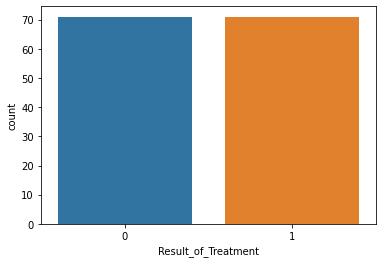

In [24]:
sns.countplot(data2['Result_of_Treatment'])

In [25]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               142 non-null    int64  
 1   age                  142 non-null    int64  
 2   Number_of_Warts      142 non-null    int64  
 3   Area                 142 non-null    int64  
 4   induration_diameter  142 non-null    int64  
 5   Type                 142 non-null    int64  
 6   Time                 142 non-null    float64
 7   Result_of_Treatment  142 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 9.0 KB


### model

In [26]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
LR_MAPE= mean_absolute_percentage_error(y_test, y_pred)*100
print("MAPE: ",LR_MAPE)
print("Score: ",linreg.score(X_test, y_test))

Root Mean Squared Error (RMSE):  0.3726931213753535
MAPE:  6.825081351930549e+16
Score:  0.1963633442599414


In [27]:
comparison_table = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
comparison_table

,y_test,y_pred
0,1,0.654960
1,1,0.684633
2,1,1.132770
3,1,0.868102
4,0,0.665100
5,1,0.810989
6,1,1.086048
7,1,0.849258
8,0,0.698825


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = KNeighborsClassifier(metric = "euclidean")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[1 1]
 [0 7]]
Accuracy Score:  0.8888888888888888


In [29]:
comparison_table = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
comparison_table.head()

,y_test,y_pred
0,0,0
1,0,1
2,1,1
3,1,1
4,1,1


### CLUSTERING

In [30]:
scale = StandardScaler()
scaled = scale.fit_transform(data2)
# set the parameter for evaluating K
kmeans_kwargs = {"init": "k-means++","n_init": 10,"max_iter": 300,"random_state": 42}
sse = []
# check the inertia for each K
for k in range(1, 11):
    kmeansmodel = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeansmodel.fit(scaled)
    sse.append(kmeansmodel.inertia_)

D:\Aplikasi\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Aplikasi\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Aplikasi\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Aplikasi\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

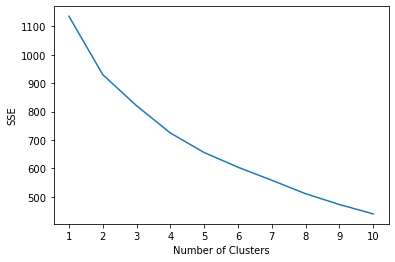

In [31]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [32]:
kneeloc = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kneeloc.elbow

4

In [33]:
kmeans = KMeans(n_clusters=4,init="random").fit(scaled)
sse.append(kmeansmodel.inertia_)
data_kmeans = kmeans.predict(scaled)
data2["Cluster"]=data_kmeans
data2.head()

D:\Aplikasi\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,gender,age,Number_of_Warts,Area,induration_diameter,Type,Time,Result_of_Treatment,Cluster
0,1,15,6,30,25,1,11.00,0,1
1,1,27,6,208,6,1,11.75,0,1
2,1,32,9,43,50,1,12.00,0,1
3,1,33,7,379,7,2,1.75,0,0
4,1,34,7,64,7,3,5.00,0,2


In [34]:
data2.groupby("Cluster").agg(Gender = ('gender', pd.Series.mode), 
                          Age = ('age', 'mean'), 
                          Time = ('Time', 'mean'), 
                          Number_of_Warts = ('Number_of_Warts', 'mean'), 
                          Type = ('Type', pd.Series.mode), 
                          Area = ('Area', 'mean'), 
                          Induration_Diameter = ('induration_diameter', 'mean'), 
                          Result_of_Treatment = ('Result_of_Treatment', pd.Series.mode), 
                          Count = ('Cluster', 'count'))

,Gender,Age,Time,Number_of_Warts,Type,Area,Induration_Diameter,Result_of_Treatment,Count
Cluster,,,,,,,,,
0,1,31.111111,6.498334,5.888889,1,462.333333,13.111111,1,9
1,1,36.639344,10.227423,6.967213,1,67.918033,14.163934,0,61
2,1,29.520000,5.014400,9.040000,3,52.040000,22.840000,1,25
3,2,28.510638,7.046796,3.723404,1,62.340426,7.978723,1,47
